# Optimize Therapty Settings

In this notebook we will explore the penalties for different therapy settings and try to minimize the penalty.




## Imports

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import json
from data_science_tidepool_api_python.makedata.tidepool_api import TidepoolAPI

ModuleNotFoundError: No module named 'data_science_tidepool_api_python'

## Load Data

In [17]:
# Define start- and end-date for computation of penalties
start_date = datetime(2023, 2, 9, 12, 0)
end_date = datetime(2023, 2, 10, 12, 0)

In [20]:
# Load data from Tidepool API
with open('credentials.json', 'r') as f:
    credentials = json.load(f)

In [21]:
username = credentials['tidepool_api']['email']
password = credentials['tidepool_api']['password']
tp_api = TidepoolAPI(username, password)
tp_api.login()
# All the data in json format
user_data = tp_api.get_user_event_data(start_date - timedelta(days=1), end_date + timedelta(days=1))
tp_api.logout()

NameError: name 'TidepoolAPI' is not defined

## Create Planes of Penalties

## 3D Plot of Penalties


We start simple, by having 5 different carb ratios, and 5 different linear combinations of basal and ISF (negatively proporionate). This means that each plane should concist of 5 lists of 5 values each.

In [3]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

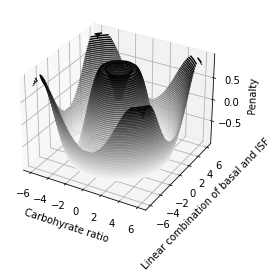

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('Carbohyrate ratio')
ax.set_ylabel('Linear combination of basal and ISF')
ax.set_zlabel('Penalty');

In [9]:
carb_ratios = np.linspace(8, 12, 5)

In [11]:
# Linear combination of basal and ISF
insulin_sens = np.linspace(1, 5, 5)

Insulin sensitivity above when 1 gives:
- basal = 1.0
- 4.5

Insulin sensitivity above when 5 gives:
- basal = 0.6
- ISF = 5.0